In [ ]:
#import semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
import joblib

In [5]:
#impor data  dummy
path = ("./data/Data_Sensor_NPK_Dummy_Last.csv")

df = pd.read_csv(path)

# **Preprocessing**

In [6]:
df.head(5)

,Nitrogen (mg/kg),Fosfor (mg/kg),Kalium (mg/kg),pH,Kelembapan (%),Suhu (°C),EC (dS/m),Salinitas (ppt),TDS (ppm),Kondisi Tanah,Rekomendasi Tindakan
0,336,197,3533,6.35,64.64,32.11,0.34,139.65,1192.41,Baik,"tambahkan pupuk banyak, cukup air"
1,669,326,2904,6.46,53.48,21.64,1.87,329.43,1678.81,Baik,"tambahkan pupuk sedang, cukup air"
2,504,265,3092,6.07,57.22,25.96,1.25,155.13,3378.71,Baik,"tambahkan pupuk sedang, cukup air"
3,340,152,2735,6.01,62.75,25.05,1.35,275.16,3413.19,Baik,"tambahkan pupuk banyak, cukup air"
4,305,174,1840,5.59,51.41,28.54,0.86,234.81,1621.25,Baik,"tambahkan pupuk banyak, cukup air"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nitrogen (mg/kg)      10000 non-null  int64  
 1   Fosfor (mg/kg)        10000 non-null  int64  
 2   Kalium (mg/kg)        10000 non-null  int64  
 3   pH                    10000 non-null  float64
 4   Kelembapan (%)        10000 non-null  float64
 5   Suhu (°C)             10000 non-null  float64
 6   EC (dS/m)             10000 non-null  float64
 7   Salinitas (ppt)       10000 non-null  float64
 8   TDS (ppm)             10000 non-null  float64
 9   Kondisi Tanah         10000 non-null  object 
 10  Rekomendasi Tindakan  10000 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 859.5+ KB


In [8]:
#cek apakah ada data yang null
df.isnull().sum()

Nitrogen (mg/kg)        0
Fosfor (mg/kg)          0
Kalium (mg/kg)          0
pH                      0
Kelembapan (%)          0
Suhu (°C)               0
EC (dS/m)               0
Salinitas (ppt)         0
TDS (ppm)               0
Kondisi Tanah           0
Rekomendasi Tindakan    0
dtype: int64

In [9]:
df.duplicated().sum()

4513

In [10]:
df_clean = df.drop_duplicates()

In [11]:
df_clean.describe()

,Nitrogen (mg/kg),Fosfor (mg/kg),Kalium (mg/kg),pH,Kelembapan (%),Suhu (°C),EC (dS/m),Salinitas (ppt),TDS (ppm)
count,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000
mean,780.769273,788.563149,1513.487516,6.356734,44.298495,29.226098,3.716665,429.756269,2997.352983
std,384.561411,586.043270,900.626112,1.014778,19.424820,7.579413,3.039758,264.677617,1433.529415
min,200.000000,100.000000,100.000000,4.500000,10.010000,15.000000,0.050000,50.570000,500.610000
25%,461.000000,271.000000,817.000000,5.680000,24.895000,23.320000,1.120000,214.340000,1799.655000
50%,717.000000,587.000000,1432.000000,6.170000,50.920000,28.780000,2.490000,326.760000,2897.780000
75%,1077.000000,1296.000000,1932.000000,7.000000,60.870000,34.430000,6.350000,642.945000,3971.530000
max,1600.000000,2000.000000,3772.000000,9.000000,74.990000,45.000000,9.990000,999.480000,5997.790000


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5487 entries, 0 to 9957
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nitrogen (mg/kg)      5487 non-null   int64  
 1   Fosfor (mg/kg)        5487 non-null   int64  
 2   Kalium (mg/kg)        5487 non-null   int64  
 3   pH                    5487 non-null   float64
 4   Kelembapan (%)        5487 non-null   float64
 5   Suhu (°C)             5487 non-null   float64
 6   EC (dS/m)             5487 non-null   float64
 7   Salinitas (ppt)       5487 non-null   float64
 8   TDS (ppm)             5487 non-null   float64
 9   Kondisi Tanah         5487 non-null   object 
 10  Rekomendasi Tindakan  5487 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 514.4+ KB


In [13]:
#encode rekomendasi pupuk
le_pupuk = LabelEncoder()
df['kondisi_encode'] = le_pupuk.fit_transform(df['Kondisi Tanah'])
le_pupuk.classes_
#joblib.dump(le_pupuk, "le_kondisi.pkl")

array(['Baik', 'Buruk', 'Cukup'], dtype=object)

In [14]:
#encode rekomendasi air
le_rekom = LabelEncoder()
df['Rekomendasi Encode'] = le_rekom.fit_transform(df['Rekomendasi Tindakan'])

le_rekom.classes_
#joblib.dump(le_rekom, "le_rekomendasi.pkl")

array(['tambahkan pupuk banyak, cukup air',
       'tambahkan pupuk banyak, tambahkan air',
       'tambahkan pupuk dikit, cukup air',
       'tambahkan pupuk dikit, tambahkan air',
       'tambahkan pupuk sedang, cukup air',
       'tambahkan pupuk sedang, tambahkan air'], dtype=object)

In [15]:
df.head()

,Nitrogen (mg/kg),Fosfor (mg/kg),Kalium (mg/kg),pH,Kelembapan (%),Suhu (°C),EC (dS/m),Salinitas (ppt),TDS (ppm),Kondisi Tanah,Rekomendasi Tindakan,kondisi_encode,Rekomendasi Encode
0,336,197,3533,6.35,64.64,32.11,0.34,139.65,1192.41,Baik,"tambahkan pupuk banyak, cukup air",0,0
1,669,326,2904,6.46,53.48,21.64,1.87,329.43,1678.81,Baik,"tambahkan pupuk sedang, cukup air",0,4
2,504,265,3092,6.07,57.22,25.96,1.25,155.13,3378.71,Baik,"tambahkan pupuk sedang, cukup air",0,4
3,340,152,2735,6.01,62.75,25.05,1.35,275.16,3413.19,Baik,"tambahkan pupuk banyak, cukup air",0,0
4,305,174,1840,5.59,51.41,28.54,0.86,234.81,1621.25,Baik,"tambahkan pupuk banyak, cukup air",0,0


In [16]:
#normalisasi data
minmax_scaler = MinMaxScaler()
X = df[['Nitrogen (mg/kg)', 'Fosfor (mg/kg)', 'Kalium (mg/kg)', 'pH', 'Kelembapan (%)', 'Suhu (°C)','EC (dS/m)', 'Salinitas (ppt)', 'TDS (ppm)']]
y = df[['kondisi_encode', 'Rekomendasi Encode']]

X = minmax_scaler.fit_transform(X)

#joblib.dump(minmax_scaler, "scaler.pkl")


# **Pembuatan Model Random Forest**

In [17]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 40)
y_train

,kondisi_encode,Rekomendasi Encode
1309,0,4
8016,2,3
2795,2,3
9227,1,1
7094,2,0
...,...,...
7839,2,3
3603,1,3
5959,2,0
5426,0,4


In [18]:
#model Random Forest
model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train, y_train)
y_predict = model_random_forest.predict(X_test)


In [19]:
#Evaluasi Model
for i, col in enumerate(y_test.columns):
    acc = accuracy_score(y_test.iloc[:, i], y_predict[:, i])
    print(f"Accuracy untuk {col}: {acc:.4f}")

for i, col in enumerate(y_test.columns):
    classic_report = classification_report(y_test.iloc[:, i], y_predict[:, i])
    print(f"Claasification Report\n{col}:\n {classic_report}")

Accuracy untuk kondisi_encode: 0.9590
Accuracy untuk Rekomendasi Encode: 0.9610
Claasification Report
kondisi_encode:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       984
           1       0.97      0.95      0.96      1030
           2       0.95      0.96      0.96       986

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Claasification Report
Rekomendasi Encode:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       536
           1       0.95      0.94      0.95       354
           2       0.94      0.93      0.94       266
           3       0.97      0.96      0.96       731
           4       0.97      0.98      0.97       712
           5       0.96      0.96      0.96       401

    accuracy                           0.96      3000
   macro avg       0.96

In [20]:
#save model

import joblib

joblib.dump(model_random_forest, "model_random_forest.pkl")

['model_random_forest.pkl']

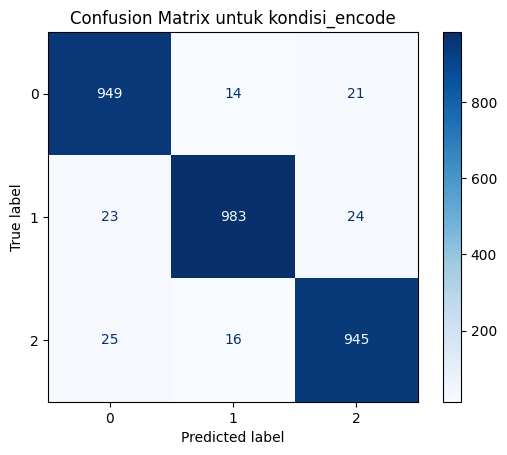

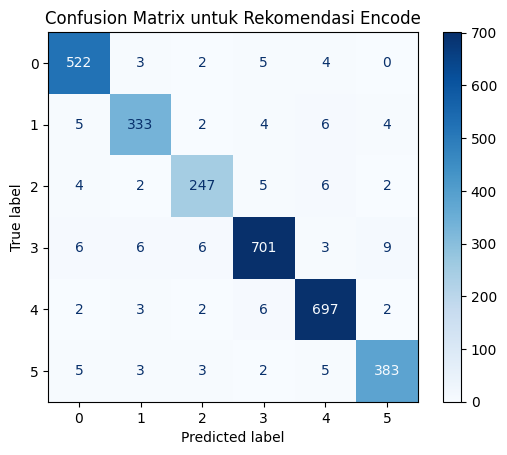

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for i, col in enumerate(y_test.columns):
    cm = confusion_matrix(y_test.iloc[:, i], y_predict[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix untuk {col}')
    plt.show()


# **Pembuatan Model Decision Tree**

In [22]:
decisiontree = DecisionTreeClassifier(criterion= 'entropy', random_state= 42)

decisiontree.fit(X_train, y_train)
y_predict = decisiontree.predict(X_test)
y_predict


array([[0, 4],
       [0, 4],
       [2, 5],
       ...,
       [0, 4],
       [0, 4],
       [0, 4]])

In [23]:
#Evaluasi Model
for i, col in enumerate(y_test.columns):
    acc = accuracy_score(y_test.iloc[:, i], y_predict[:, i])
    print(f"Accuracy untuk {col}: {acc:.4f}")

for i, col in enumerate(y_test.columns):
    classic_report = classification_report(y_test.iloc[:, i], y_predict[:, i])
    print(f"Claasification Report\n{col}:\n {classic_report}")


Accuracy untuk kondisi_encode: 0.9530
Accuracy untuk Rekomendasi Encode: 0.9530
Claasification Report
kondisi_encode:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       984
           1       0.97      0.95      0.96      1030
           2       0.95      0.94      0.95       986

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

Claasification Report
Rekomendasi Encode:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       536
           1       0.94      0.95      0.94       354
           2       0.93      0.92      0.92       266
           3       0.96      0.95      0.96       731
           4       0.96      0.97      0.97       712
           5       0.96      0.93      0.94       401

    accuracy                           0.95      3000
   macro avg       0.95

In [24]:
#simpan model 
joblib.dump(decisiontree, "model_decisiontree.pkl")

['model_decisiontree.pkl']

# **Pembuatan Model ANN**

In [25]:
#inisialisasi output
rekomendasi = y_train['Rekomendasi Encode']
kondisi = y_train['kondisi_encode']

In [26]:
#input layer (9 fitur)
input_layer = Input(shape=(9, ))

#hidden layer
hidden_layer = Dense(64, activation='relu')(input_layer)
hidden_layer= Dense(32, activation= 'relu')(hidden_layer)

#output kondisi
output_kondisi = Dense(3, activation= 'softmax', name= 'kondisi')(hidden_layer)

#output rekomendsi
output_rekomendasi = Dense(6, activation= 'softmax', name= 'rekomendasi')(hidden_layer)

In [27]:
model_ANN = Model(inputs= input_layer, outputs=[output_kondisi, output_rekomendasi])
model_ANN.compile(
    optimizer='adam',
    loss={
        'kondisi': 'sparse_categorical_crossentropy',
        'rekomendasi': 'sparse_categorical_crossentropy'
    },
    metrics= {
    'kondisi': 'accuracy',
    'rekomendasi': 'accuracy'
    }
)

In [28]:
model_ANN.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 kondisi (Dense)                (None, 3)            99          ['dense_1[0][0]']                
                                                                                              

In [29]:
history = model_ANN.fit(X_train,{
    'kondisi': y_train['kondisi_encode'],
    'rekomendasi': y_train['Rekomendasi Encode']
},epochs= 50, batch_size= 15)

Epoch 1/50
467/467 [==============================] - 6s 9ms/step - loss: 1.4647 - kondisi_loss: 0.4515 - rekomendasi_loss: 1.0133 - kondisi_accuracy: 0.8800 - rekomendasi_accuracy: 0.6227
Epoch 2/50
467/467 [==============================] - 4s 9ms/step - loss: 0.7561 - kondisi_loss: 0.2527 - rekomendasi_loss: 0.5034 - kondisi_accuracy: 0.9459 - rekomendasi_accuracy: 0.8799
Epoch 3/50
467/467 [==============================] - 4s 9ms/step - loss: 0.6704 - kondisi_loss: 0.2364 - rekomendasi_loss: 0.4339 - kondisi_accuracy: 0.9499 - rekomendasi_accuracy: 0.9091
Epoch 4/50
467/467 [==============================] - 5s 12ms/step - loss: 0.6410 - kondisi_loss: 0.2303 - rekomendasi_loss: 0.4107 - kondisi_accuracy: 0.9521 - rekomendasi_accuracy: 0.9179
Epoch 5/50
467/467 [==============================] - 8s 17ms/step - loss: 0.6224 - kondisi_loss: 0.2232 - rekomendasi_loss: 0.3992 - kondisi_accuracy: 0.9533 - rekomendasi_accuracy: 0.9210
Epoch 6/50
467/467 [==============================] -

In [30]:
model_ANN.evaluate(X_test, {'kondisi': y_test['kondisi_encode'], 'rekomendasi': y_test['Rekomendasi Encode']})


94/94 [==============================] - 1s 12ms/step - loss: 0.4181 - kondisi_loss: 0.1707 - rekomendasi_loss: 0.2474 - kondisi_accuracy: 0.9680 - rekomendasi_accuracy: 0.9510


[0.418113648891449,
 0.17070719599723816,
 0.24740636348724365,
 0.9679999947547913,
 0.9509999752044678]

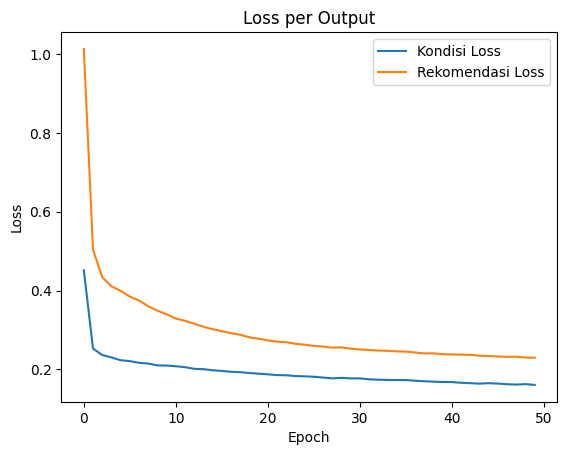

In [31]:
# Loss
plt.plot(figsize= (8,13))
plt.plot(history.history['kondisi_loss'], label='Kondisi Loss')
plt.plot(history.history['rekomendasi_loss'], label='Rekomendasi Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Output')
plt.legend()
plt.show()

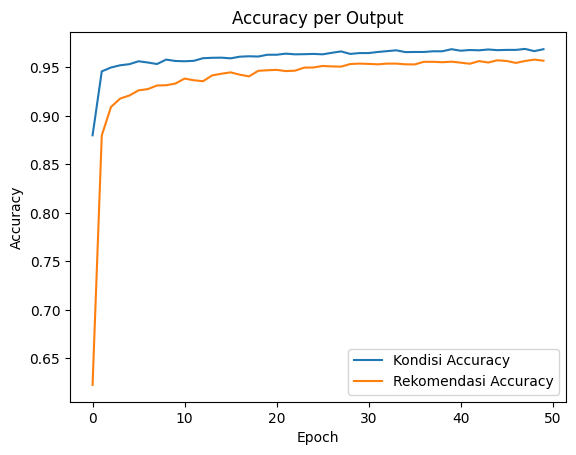

In [32]:

# Accuracy
plt.plot(figsize= (8, 13))
plt.plot(history.history['kondisi_accuracy'], label='Kondisi Accuracy')
plt.plot(history.history['rekomendasi_accuracy'], label='Rekomendasi Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Output')
plt.legend()
plt.show()

In [33]:
model_ANN.save("model_ann")

INFO:tensorflow:Assets written to: model_ann\assets


In [34]:
loaded_model = tf.keras.models.load_model("./model_ann")
loaded_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 kondisi (Dense)                (None, 3)            99          ['dense_1[0][0]']                
                                                                                              

In [35]:
!pip show tensorflow